<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/RidgeAndLassoRegression/practice_with_kaggle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/housing.csv')

In [4]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.shape

(20640, 10)

In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
x = df.drop(columns=['median_house_value'])
y = df['median_house_value']

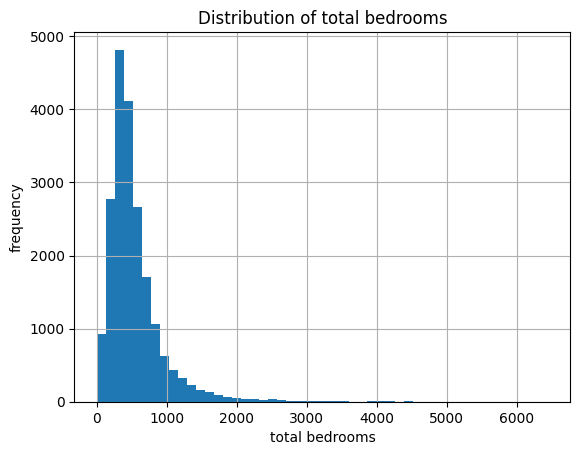

In [9]:
# okay i have missing values for total_bedrooms

# let's check with plotting the histogram

df['total_bedrooms'].hist(bins=50)
plt.title("Distribution of total bedrooms")
plt.xlabel('total bedrooms')
plt.ylabel('frequency')
plt.show()

<Axes: ylabel='total_bedrooms'>

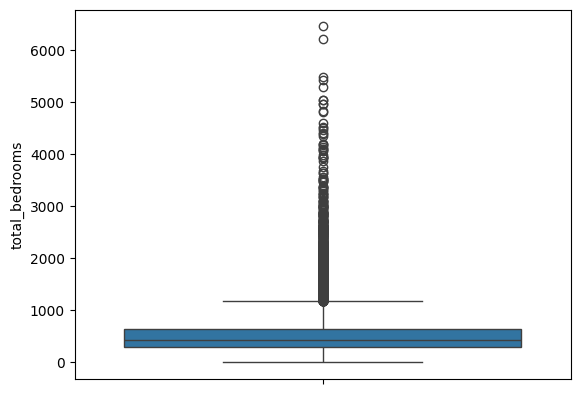

In [10]:
# i think we have outliers, let's plot a box plot
import seaborn as sns
sns.boxplot(df['total_bedrooms'])

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['total_bedrooms']] = imputer.fit_transform(df[['total_bedrooms']])

<Axes: ylabel='total_bedrooms'>

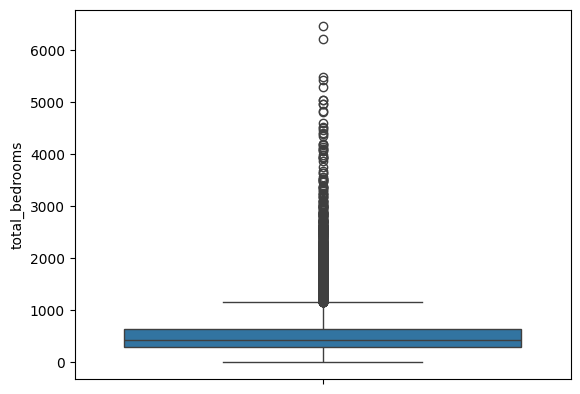

In [12]:
sns.boxplot(df['total_bedrooms'])

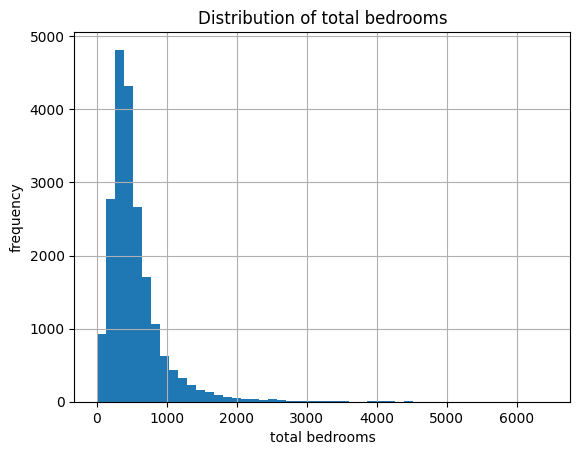

In [13]:
df['total_bedrooms'].hist(bins=50)
plt.title("Distribution of total bedrooms")
plt.xlabel('total bedrooms')
plt.ylabel('frequency')
plt.show()

In [14]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [15]:
# before scaling you need to encode the ocean_proximity variable
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['ocean_proximity']
numerical_features = df.drop(columns=['ocean_proximity', 'median_house_value'], axis=1).columns.tolist()

preprocessor = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_features),
    ('categorical', OneHotEncoder(), categorical_features)
])

x = preprocessor.fit_transform(df)

In [16]:
# here, i am creating a new dataframe after applying the pipeline

# Before anything, i need to get names from OneHotEncoder
onehot_feature_names = preprocessor.named_transformers_['categorical']\
.get_feature_names_out(['ocean_proximity'])

# 1. combining all the feature names
all_feature_names = list(numerical_features) + list(onehot_feature_names)

# 2. Create a DataFrame
x_scaled_df = pd.DataFrame(x, columns=all_feature_names)



In [17]:
x_scaled_df.shape

(20640, 13)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42)

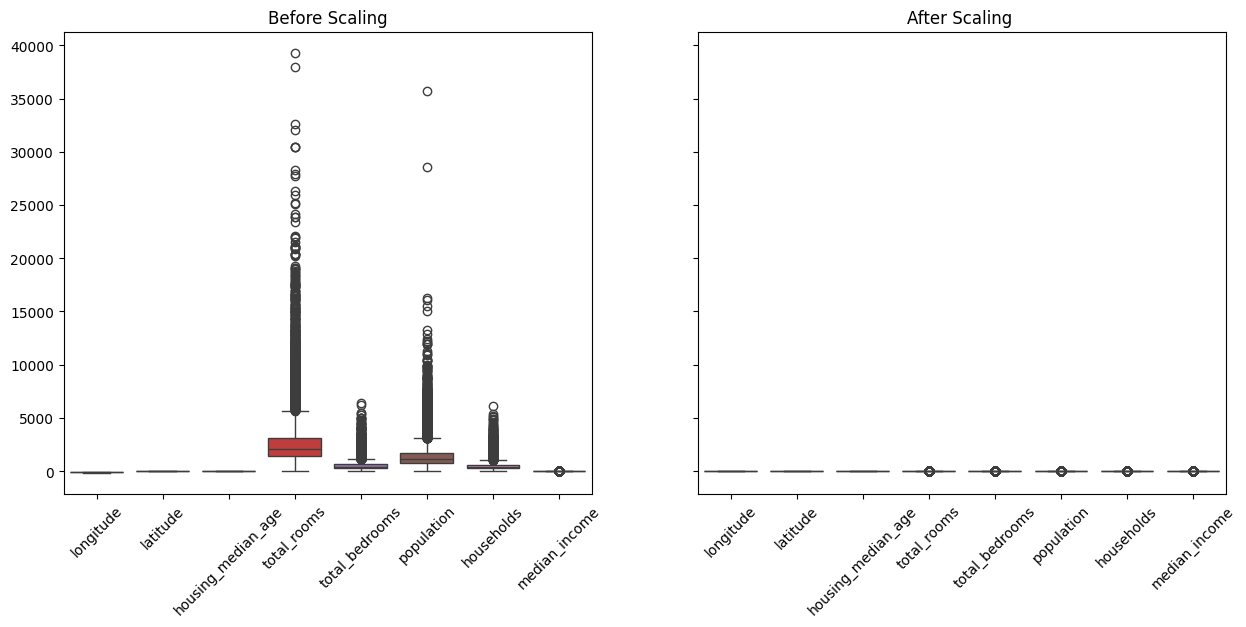

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

# Before scaling(raw data)
sns.boxplot(data=df[numerical_features], ax=axes[0])
axes[0].set_title('Before Scaling')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot after scaling
sns.boxplot(data=x_scaled_df[numerical_features], ax=axes[1])
axes[1].set_title("After Scaling ")
axes[1].tick_params(axis='x', rotation=45)

plt.show()

In [21]:
from sklearn.linear_model import Ridge
reg = Ridge(0.1)

In [22]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
r2Score = r2_score(y_test, y_pred)
meanSquaredError = mean_squared_error(y_test, y_pred)
meanAbsoluterError = mean_absolute_error(y_test, y_pred)

print("R2 Score : ", r2Score)
print("Mean Squared Error : ", meanSquaredError)
print("Mean Absolute Error : ", meanAbsoluterError)
coefs_ridge = reg.coef_
print(coefs_ridge)

R2 Score :  0.6254160602764263
Mean Squared Error :  4908581577.186191
Mean Absolute Error :  50671.53763829441
[-53765.98262899 -54394.78047697  13871.8214937  -13132.62198434
  43105.80963148 -43227.37532014  18445.61974594  74990.27177255
 -18352.46750962 -58140.52781123 114899.42409395 -23486.15772437
 -14920.27106562]


In [23]:
from sklearn.linear_model import Lasso
reg = Lasso(0.1)

In [24]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
r2Score = r2_score(y_test, y_pred)
meanSquaredError = mean_squared_error(y_test, y_pred)
meanAbsoluterError = mean_absolute_error(y_test, y_pred)

print("R2 Score : ", r2Score)
print("Mean Squared Error : ", meanSquaredError)
print("Mean Absolute Error : ", meanAbsoluterError)
coefs_lasso = reg.coef_
print(coefs_lasso)

R2 Score :  0.6254228823050292
Mean Squared Error :  4908492180.710879
Mean Absolute Error :  50670.8588605253
[-53769.56449275 -54397.39632853  13871.40978857 -13134.24260963
  43107.08905725 -43227.78456163  18446.41673937  74991.18253155
  15841.38199919 -23945.7305499  151553.38319199  10703.74698924
  19271.50814269]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.263e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


In [25]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [26]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
r2Score = r2_score(y_test, y_pred)
meanSquaredError = mean_squared_error(y_test, y_pred)
meanAbsoluterError = mean_absolute_error(y_test, y_pred)

print("R2 Score : ", r2Score)
print("Mean Squared Error : ", meanSquaredError)
print("Mean Absolute Error : ", meanAbsoluterError)
coefs_elasticNet = reg.coef_
print(coefs_elasticNet)

R2 Score :  0.622599340708726
Mean Squared Error :  4945492123.293203
Mean Absolute Error :  50850.83203137685
[-28035.97913339 -28029.94381351  14273.89342954   -896.0938062
  21864.16504592 -32501.58505638  17781.83844116  70152.47587937
  12181.75039691 -38121.60243441    778.67456334   9530.08862715
  15628.08880161]


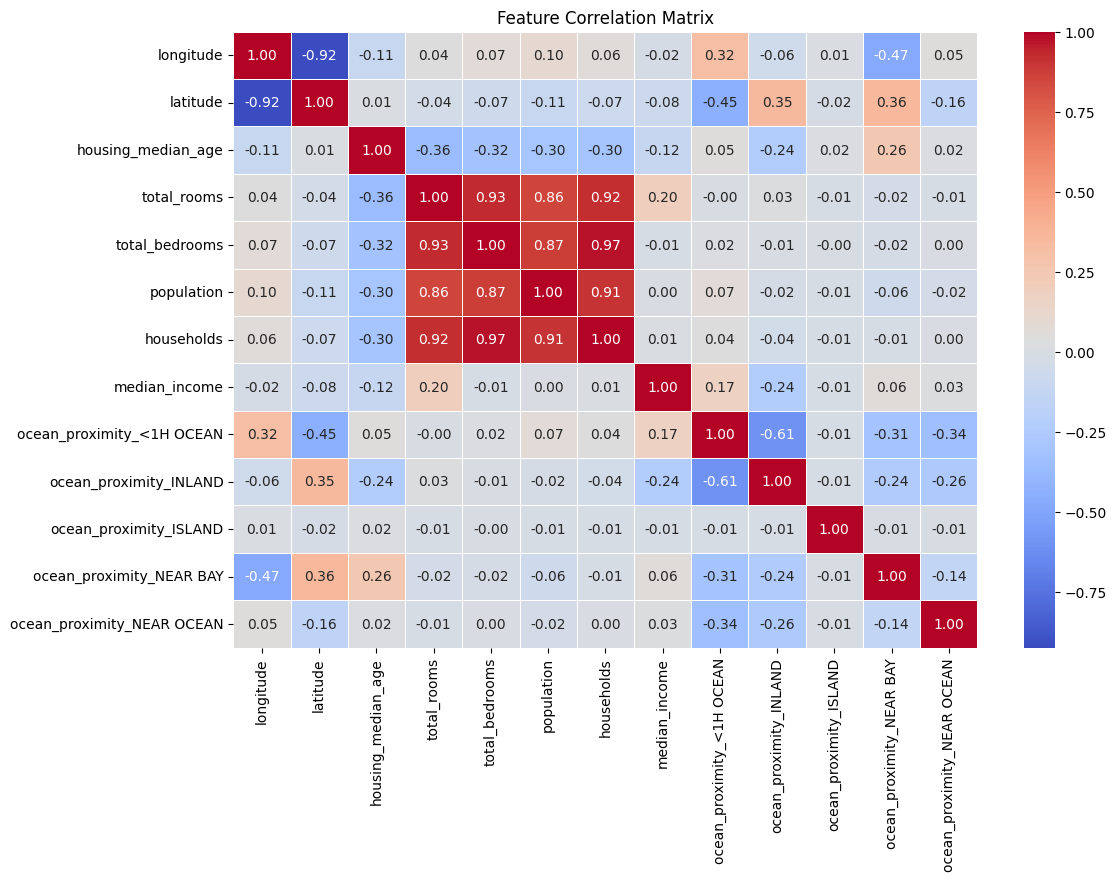

In [27]:
import seaborn as sns
# compute the correlation matrix
corr_matrix = x_scaled_df.corr()

# plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

1. Plotting Coefficient Paths(How Weights change with alpha)

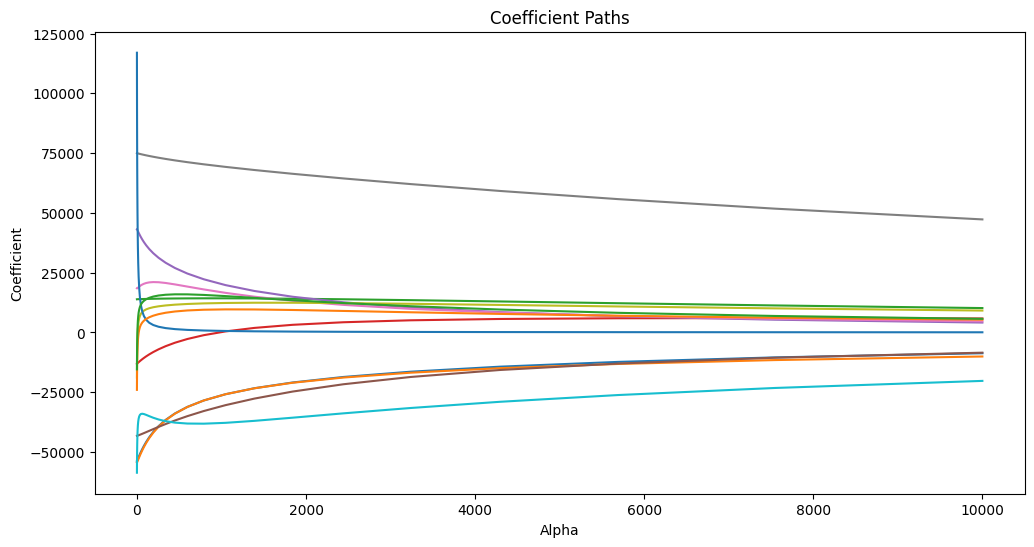

In [28]:
alphas = np.logspace(-2, 4, 50) #from 0.01 to 10000 (log scale)
coefs_ = []

for alpha in alphas:
  reg = Ridge(alpha=alpha)
  reg.fit(x_train, y_train)
  coefs_.append(reg.coef_)
coefs_ = np.array(coefs_)


# plotting
plt.figure(figsize=(12, 6))
for i in range(coefs_.shape[1]): #no. of columns
  plt.plot(alphas, coefs_[:, i], label=f"Feature {i+1}")


plt.xlabel("Alpha")
plt.ylabel("Coefficient")
plt.title("Coefficient Paths")

plt.show()

2. Plotting R2 Score vs Alpha

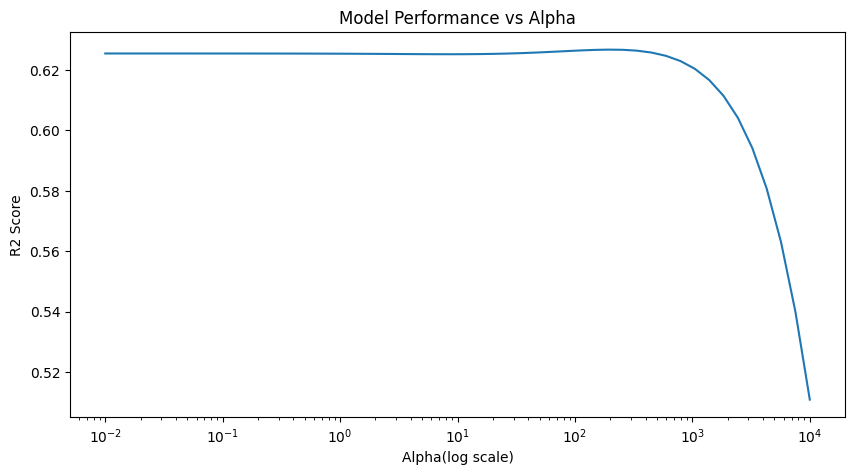

In [30]:
r2_scores=[]

for alpha in alphas:
  reg = Ridge(alpha=alpha)
  reg.fit(x_train, y_train)
  y_pred = reg.predict(x_test)
  r2_scores.append(r2_score(y_test, y_pred))


# plotting
plt.figure(figsize=(10, 5))
plt.plot(alphas, r2_scores)
plt.xscale('log')
plt.xlabel("Alpha(log scale)")
plt.ylabel("R2 Score")
plt.title("Model Performance vs Alpha")

plt.show()